In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import ceil

In [2]:
wk_weights = []
with open("output/wk_weight_results.txt", encoding="utf-8") as f:
    for line in f:
        if line.startswith("wk_weight"):
            weight = float(line.split("=")[1].strip())
            wk_weights.append(weight)

print(wk_weights)

[2.1, 3.78, 2.1, 2.1, 2.1, 1.0, 1.0, 1.0, 100.0, 3.6, 1.0, 1.35, 1.0, 3.86, 62.41, 74.4, 74.4, 100.0, 1.0, 1.0, 1.0, 1.0, 1.55, 1.14, 1.14, 2.31, 1.0, 1.37, 2.08, 1.0, 8.46, 1.0, 1.0, 3.31, 3.21, 2.59, 5.02, 1.02, 2.03, 1.36, 1.0, 3.02, 100.0, 1.53, 1.0, 5.08, 1.0, 1.0, 1.0, 1.05, 1.0, 1.03, 1.0, 1.0, 6.27, 1.31, 1.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


60


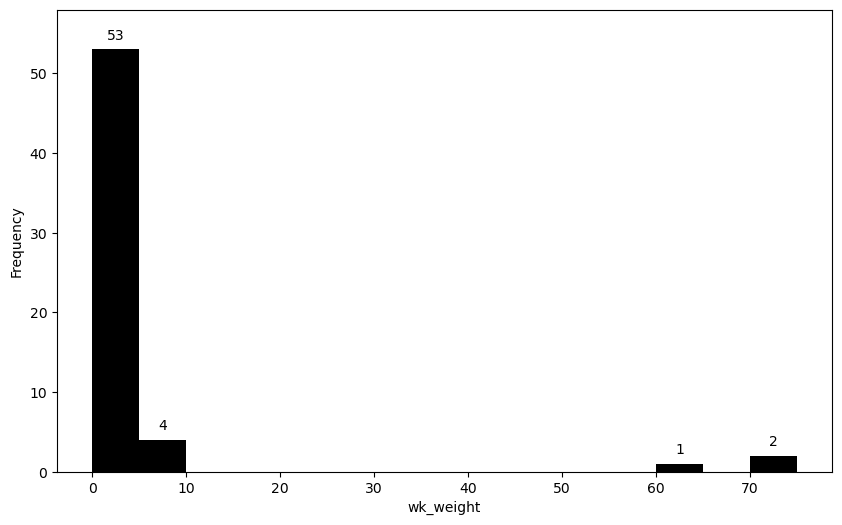

In [3]:
step_size = 5

# histogram for all computed wk_weight(s)
fig, ax = plt.subplots(figsize=(10,6))
wk_weights_less_100 = [x for x in wk_weights if x < 100]
num_bins = np.arange(0, ceil(max(wk_weights_less_100)) + step_size, step_size)
n, bins, patches = ax.hist(wk_weights_less_100, density=False, bins=num_bins, color='k')  # density=False would make counts

# Add numbers on the top of bars
for rect in ax.patches:
    height = rect.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel("wk_weight")
ax.set_ylabel("Frequency")
ax.set_ylim(0, max(n)+5)
plt.savefig('output/hist_wk_weight[1-100).png', dpi=300, bbox_inches='tight')

print(len(wk_weights_less_100))

1.846842105263158

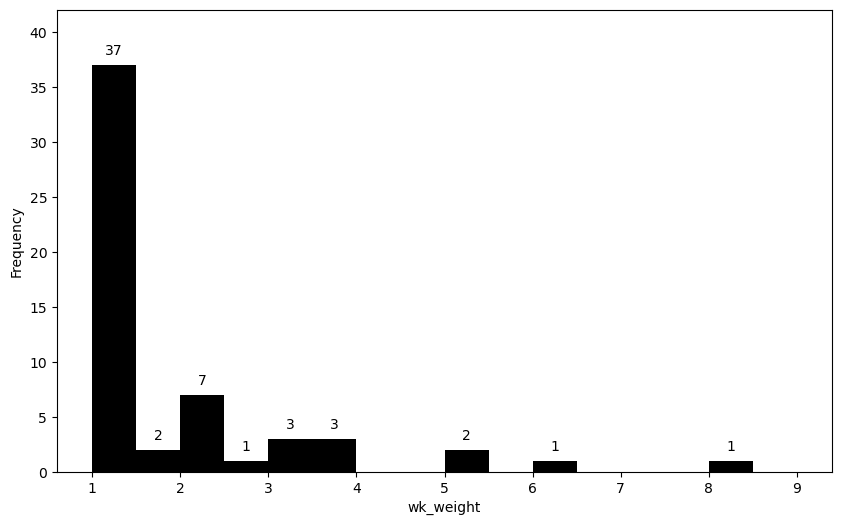

In [4]:
step_size = 0.5

# histogram for computed wk_weight(s) in between 1 and 10
fig, ax = plt.subplots(figsize=(10,6))
wk_weights_less_10 = [x for x in wk_weights if x < 10]
num_bins = np.arange(1, ceil(max(wk_weights_less_10)) + step_size, step_size)
n, bins, patches = ax.hist(wk_weights_less_10, density=False, bins=num_bins, color='k')  # density=False would make counts
# Add numbers on the top of each bar
for rect in ax.patches:
    height = rect.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel("wk_weight")
ax.set_ylabel("Frequency")
ax.set_ylim(0, max(n)+5)
# ax.set_xticks(num_bins)
plt.savefig('output/hist_wk_weight[1-10).png', dpi=300, bbox_inches='tight')

np.average(wk_weights_less_10)

33
1.02


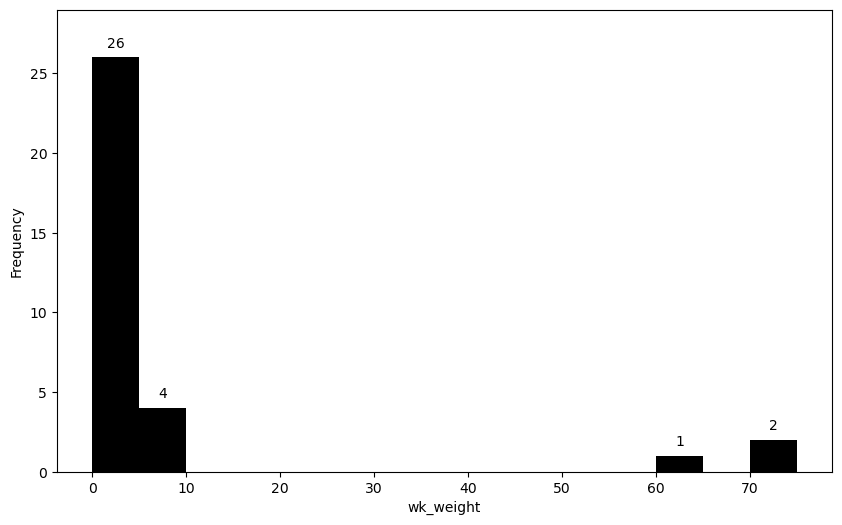

In [5]:
step_size = 5

# histogram for computed wk_weight(s) in between 1 and 100 (exclude)
fig, ax = plt.subplots(figsize=(10,6))
wk_weights_exclude_1_100 = [x for x in wk_weights if x < 100 and x > 1]
num_bins = np.arange(0, ceil(max(wk_weights_exclude_1_100)) + step_size, step_size)
n, bins, patches = ax.hist(wk_weights_exclude_1_100, density=False, bins=num_bins, color='k')  # density=False would make counts
# Add numbers on the top of each bar
for rect in ax.patches:
    height = rect.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel("wk_weight")
ax.set_ylabel("Frequency")
ax.set_ylim(0, max(n)+3)
plt.savefig('output/hist_wk_weight(1-100).png', dpi=300, bbox_inches='tight')

print(len(wk_weights_exclude_1_100))
print(min(wk_weights_exclude_1_100))

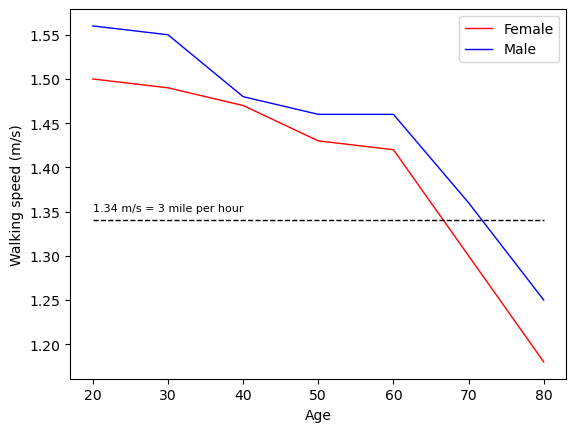

In [6]:
age_groups = range(20, 81, 10)
female_speed = [1.50, 1.49, 1.47, 1.43, 1.42, 1.30, 1.18]
male_speed = [1.56, 1.55, 1.48, 1.46, 1.46, 1.36, 1.25]

plt.plot(age_groups, female_speed, 'r', lw=1, label="Female")
plt.plot(age_groups, male_speed, 'b', lw=1, label="Male")
plt.plot(age_groups, [1.34]*7, 'k--', lw=1)

plt.annotate('1.34 m/s = 3 mile per hour', xy=(20, 1.34), xytext=(20, 1.35), color='k', fontsize=8)
plt.xlabel('Age')
plt.ylabel('Walking speed (m/s)')
plt.legend(loc="upper right")
plt.savefig('output/age_trend.png', dpi=300, bbox_inches='tight')

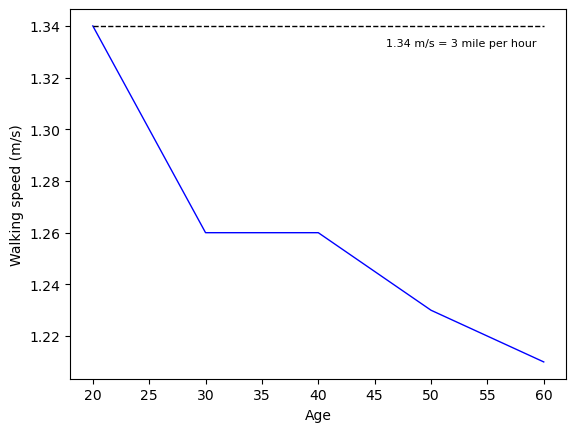

In [7]:
age_groups = range(20, 61, 10)
wk_speed = [1.34, 1.26, 1.26, 1.23, 1.21]

plt.plot(age_groups, wk_speed, 'b', lw=1)
plt.plot(age_groups, [1.34]*5, 'k--', lw=1)

plt.annotate('1.34 m/s = 3 mile per hour', xy=(20, 1.34), xytext=(46, 1.332), color='k', fontsize=8)
plt.xlabel('Age')
plt.ylabel('Walking speed (m/s)')
plt.savefig('output/age_trend_longer.png', dpi=300, bbox_inches='tight')

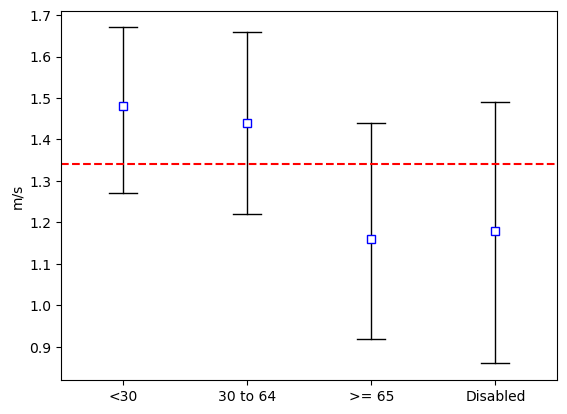

In [8]:
# use third paper to draw the trend of walking speed
 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
boxes = [
    {
        'label' : "<30",
        'whislo': 1.27,    # Bottom whisker position
        'q1'    : 1.475,    # First quartile (25th percentile)
        'med'   : 1.48,    # Median         (50th percentile)
        'mean'  : 1.48,
        'q3'    : 1.485,    # Third quartile (75th percentile)
        'whishi': 1.67,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'label' : "30 to 64",
        'whislo': 1.22,    # Bottom whisker position
        'q1'    : 1.435,    # First quartile (25th percentile)
        'med'   : 1.44,    # Median         (50th percentile)
        'mean'  : 1.44,
        'q3'    : 1.445,    # Third quartile (75th percentile)
        'whishi': 1.66,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'label' : ">= 65",
        'whislo': 0.92,    # Bottom whisker position
        'q1'    : 1.155,    # First quartile (25th percentile)
        'med'   : 1.16,    # Median         (50th percentile)
        'mean'  : 1.16,
        'q3'    : 1.165,    # Third quartile (75th percentile)
        'whishi': 1.44,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'label' : "Disabled",
        'whislo': 0.86,    # Bottom whisker position
        'q1'    : 1.175,    # First quartile (25th percentile)
        'med'   : 1.18,    # Median         (50th percentile)
        'mean'  : 1.18,
        'q3'    : 1.185,    # Third quartile (75th percentile)
        'whishi': 1.49,    # Top whisker position
        'fliers': []        # Outliers
    }
]

ax.bxp(boxes, showmeans=True, showbox=False, shownotches=False, \
        showfliers=False, patch_artist=True, \
        meanprops=dict(marker = "s",markerfacecolor="white", markeredgecolor="blue"), \
        medianprops = dict(color = "w", linewidth = 0.1))
ax.set_ylabel("m/s")
plt.axhline(1.34, c='r', linestyle='--')
plt.savefig("output/boxplot_age.png", dpi=300, bbox_inches="tight")
# plt.close()

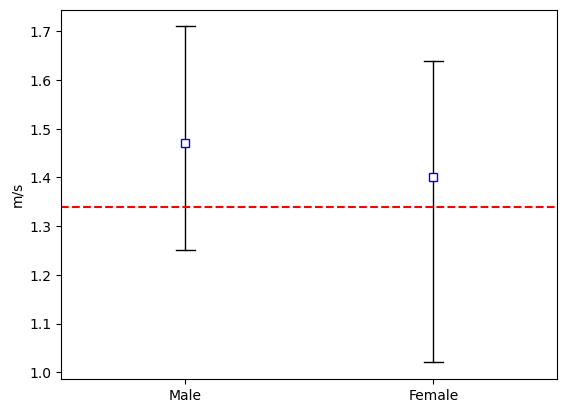

In [9]:
fig, ax = plt.subplots()
boxes = [
    {
        'label' : "Male",
        'whislo': 1.25,    # Bottom whisker position
        'q1'    : 1.467,    # First quartile (25th percentile)
        'med'   : 1.47,    # Median         (50th percentile)
        'mean'  : 1.47,
        'q3'    : 1.475,    # Third quartile (75th percentile)
        'whishi': 1.71,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'label' : "Female",
        'whislo': 1.02,    # Bottom whisker position
        'q1'    : 1.397,    # First quartile (25th percentile)
        'med'   : 1.40,    # Median         (50th percentile)
        'mean' : 1.40,
        'q3'    : 1.405,    # Third quartile (75th percentile)
        'whishi': 1.64,    # Top whisker position
        'fliers': []        # Outliers
    }
]
ax.bxp(boxes, showmeans=True, showbox=False, shownotches=False, \
        showfliers=False, patch_artist=True, \
        meanprops=dict(marker = "s",markerfacecolor="white", markeredgecolor="blue"), \
        medianprops = dict(color = "w", linewidth = 0.1))
ax.set_ylabel("m/s")
plt.axhline(1.34, c='r', linestyle='--')
plt.savefig("output/boxplot_gender.png", dpi=300, bbox_inches="tight")
# plt.close()

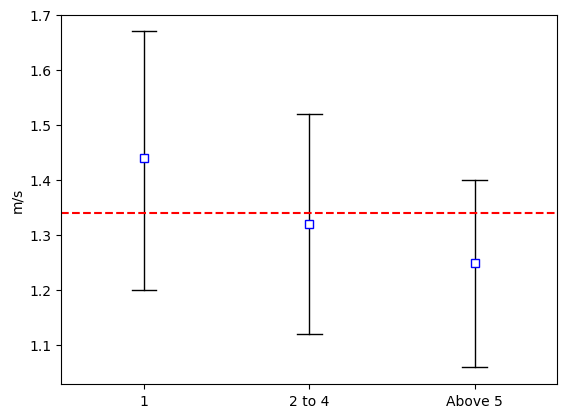

In [10]:
fig, ax = plt.subplots()
boxes = [
    {
        'label' : "1",
        'whislo': 1.20,    # Bottom whisker position
        'q1'    : 1.437,    # First quartile (25th percentile)
        'med'   : 1.44,    # Median         (50th percentile)
        'mean'  : 1.44,
        'q3'    : 1.445,    # Third quartile (75th percentile)
        'whishi': 1.67,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'label' : "2 to 4",
        'whislo': 1.12,    # Bottom whisker position
        'q1'    : 1.317,    # First quartile (25th percentile)
        'med'   : 1.32,    # Median         (50th percentile)
        'mean'  : 1.32,
        'q3'    : 1.325,    # Third quartile (75th percentile)
        'whishi': 1.52,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'label' : "Above 5",
        'whislo': 1.06,    # Bottom whisker position
        'q1'    : 1.247,    # First quartile (25th percentile)
        'med'   : 1.25,    # Median         (50th percentile)
        'mean'  : 1.25,
        'q3'    : 1.255,    # Third quartile (75th percentile)
        'whishi': 1.40,    # Top whisker position
        'fliers': []        # Outliers
    }
]
ax.bxp(boxes, showmeans=True, showbox=False, shownotches=False, \
        showfliers=False, patch_artist=True, \
        meanprops=dict(marker = "s",markerfacecolor="white", markeredgecolor="blue"), \
        medianprops = dict(color = "w", linewidth = 0.1))
ax.set_ylabel("m/s")
plt.axhline(1.34, c='r', linestyle='--')
plt.savefig("output/boxplot_groupsize.png", dpi=300, bbox_inches="tight")